# 非线性回归
一元回归拟合得到直线
多项式回归拟合得到曲线

In [138]:
x=[4,8,12,25,32,43,58,63,69,79]
y=[20,33,50,56,42,31,33,46,65,75]

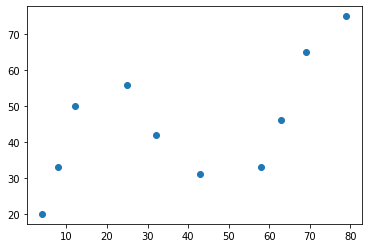

In [139]:
from matplotlib import pyplot as plt
plt.scatter(x,y)

In [140]:
import numpy as np 
# 拟合曲线方程
def f(p,x):
    w0,w1,w2 = p 
    f = w0+x*w1+w2*x*x
    return f

In [141]:
# 残差函数
def err_f(p,x,y):
    return f(p,x)- y

In [142]:
# 最小二乘法
from scipy.optimize import leastsq
#init 数值不会影响求解的过程，所以用随机数
#但init的个数影响了多项式的次数，这里是二次多项式
init = np.random.random(3)
param = leastsq(err_f,init,args=(np.array(x),np.array(y)))

In [143]:
# 最合适参数
param[0]

array([ 3.76893105e+01, -2.60474051e-01,  8.00077964e-03])

In [144]:
# y(x) = 37-0.26*x+0.008*x^2

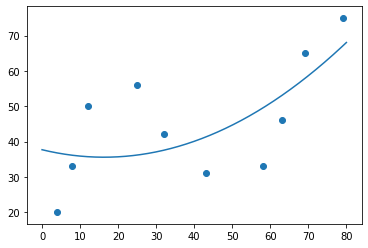

In [145]:
x_temp = np.linspace(0,80,10000)
plt.plot(x_temp,f(param[0],x_temp))
plt.scatter(x,y)

In [146]:
# n次多项式拟合
# 根据公式定义多项式函数
def f2(p,x):
# p是多项式参数w0,w1...  w是个多项式
    w = np.poly1d(p)
    return w(x)

# 残差函数
def err_f2(p,x,y):
    return f2(p,x)- y

# 利用残差公式和最小二乘法，获取n次多项式的参数 w0,w1...
def n_plot(n):
    init = np.random.random(n)
    param = leastsq(err_f2,init,args=(np.array(x),np.array(y)))
    return param[0]

In [147]:
n_plot(3)
# 注意最高次在最前面

array([ 8.00077897e-03, -2.60473995e-01,  3.76893098e+01])

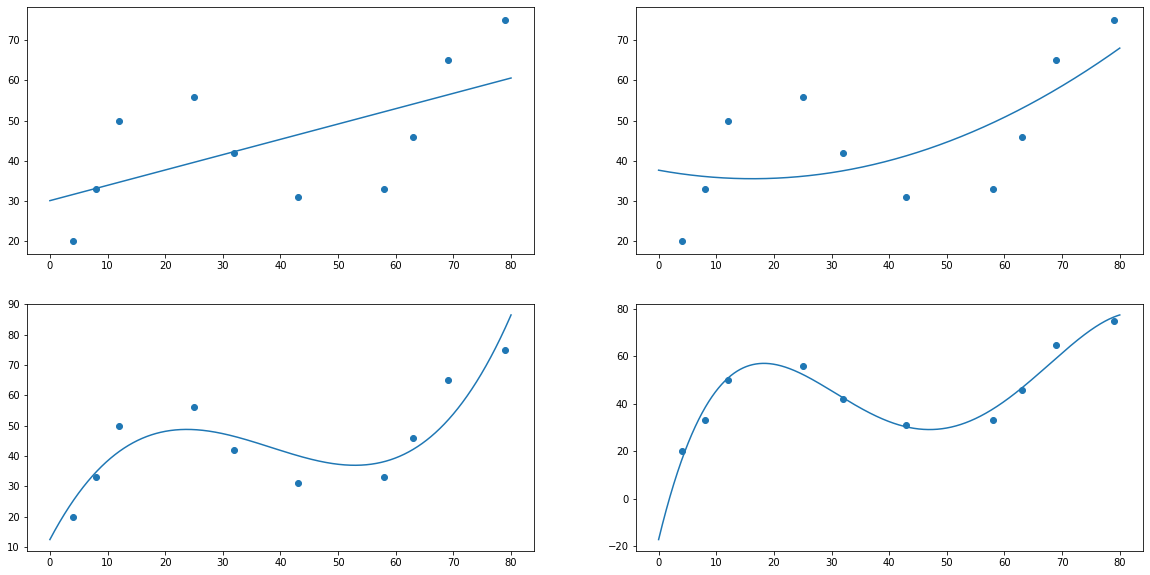

In [148]:
x_temp = np.linspace(0,80,10000)
fig,axes = plt.subplots(2,2,figsize=(20,10))

axes[0,0].plot(x_temp,f2(n_plot(2),x_temp))
axes[0,0].scatter(x,y)
axes[0,1].plot(x_temp,f2(n_plot(3),x_temp))
axes[0,1].scatter(x,y)
axes[1,0].plot(x_temp,f2(n_plot(4),x_temp))
axes[1,0].scatter(x,y)
axes[1,1].plot(x_temp,f2(n_plot(5),x_temp))
axes[1,1].scatter(x,y)


In [149]:
# sklearn 自带方法
from sklearn.preprocessing import PolynomialFeatures

x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)
x_temp =np.array(x_temp).reshape(len(x_temp),1)
#degree 次数 ，include_bias截距
# 将多项式x,x^2.... 转化为矩阵的形式[X1,X1^2]
p_x = PolynomialFeatures(degree=2,include_bias=True).fit_transform(x)
p_x_temp = PolynomialFeatures(degree=2,include_bias=True).fit_transform(x_temp)

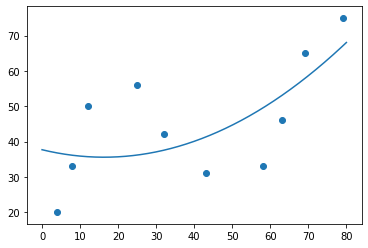

In [150]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(p_x,y)

plt.plot(x_temp,lr.predict(p_x_temp))
plt.scatter(x,y)

In [151]:
# 实例
# 世界麻疹接种率

In [152]:
import pandas as pd 
df = pd.read_csv('vaccine.csv')
df.head()

,Year,Values
0,1983,48.676809
1,1984,50.653151
2,1985,45.603729
3,1986,45.511160
4,1987,52.882892


In [153]:
x = df.Year
y = df.Values
x.head(),y.head()

(0    1983
 1    1984
 2    1985
 3    1986
 4    1987
 Name: Year, dtype: int64,
 0    48.676809
 1    50.653151
 2    45.603729
 3    45.511160
 4    52.882892
 Name: Values, dtype: float64)

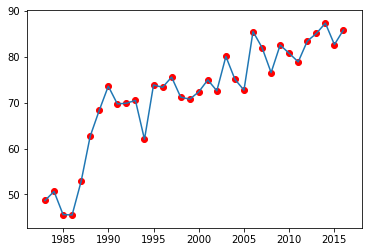

In [154]:
plt.plot(x,y)
plt.scatter(x,y,c='r')

In [155]:
# 一次线性回归模型
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [156]:
lr = LinearRegression()
X_train = np.array(X_train).reshape(len(X_train),1)
y_train = np.array(y_train).reshape(len(y_train),1)
X_test = np.array(X_test).reshape(len(X_test),1)
y_test = np.array(y_test).reshape(len(y_test),1)

x_temp = np.linspace(0,80,10000)
x_temp =np.array(x_temp).reshape(len(x_temp),1)

lr.fit(X_train,y_train)
result = lr.predict(X_test)

In [157]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("平均绝对误差",mean_absolute_error(y_test,result.flatten()))
print("均方误差",mean_squared_error(y_test,result.flatten()))

平均绝对误差 3.3465649627843748
均方误差 22.222739810526043


In [168]:
#二次线性回归模型
p_x_train = PolynomialFeatures().fit_transform(X_train)
p_x_test = PolynomialFeatures().fit_transform(X_test)
lr2 = LinearRegression()
lr2.fit(p_x_train,y_train)
result2=lr2.predict(p_x_test)
print("平均绝对误差",mean_absolute_error(y_test,result2.flatten()))
print("均方误差",mean_squared_error(y_test,result2.flatten()))
print(result2.flatten())

平均绝对误差 4.828645349837564
均方误差 29.079219086248713
[69.99653831 78.91853389 80.81996771 76.73016603 54.00386669 80.93837759
 80.2210425  75.82612549 68.56874398 79.32306239 80.53909411]


In [176]:
# make pipline 合并步骤
from sklearn.pipeline import make_pipeline

mse=[]

for m in [2,3,4,5]:
    model = make_pipeline(PolynomialFeatures(m),LinearRegression())
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("平均绝对误差",mean_absolute_error(y_test,pred.flatten()))
    print("均方误差",mean_squared_error(y_test,pred.flatten()))
    mse.append(mean_squared_error(y_test,pred.flatten()))

平均绝对误差 4.828645349837564
均方误差 29.079219086248713
平均绝对误差 3.783779737370584
均方误差 21.49264222073929
平均绝对误差 3.7868841784924823
均方误差 21.508839738271515
平均绝对误差 3.789852377704925
均方误差 21.523540539721466


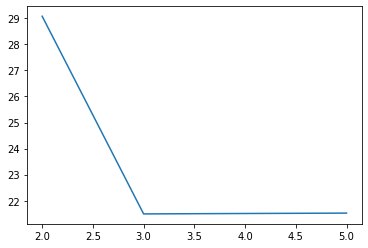

In [179]:
plt.plot([2,3,4,5],mse)
# 一般选择3,即二次多项式,避免过拟合